Import all the required fields here..!

In [251]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

from sklearn.datasets import make_blobs

import seaborn as sns

import matplotlib.pyplot as plt

from scipy import stats
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

from google.colab import drive

import warnings
warnings.filterwarnings('ignore')

import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode, plot
cf.go_offline()
import plotly
import plotly.express as px
import plotly.graph_objs as go

Connect the drive

In [252]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Get the dataset

In [253]:
dataset = pd.read_csv('/content/drive/My Drive/Mtech/DM/Consumer_Complaints.csv',error_bad_lines=False, index_col=False, dtype='unicode')
dataset.shape

(670598, 18)

Exploratory Data Analysis

Step 1: Description of data

In [254]:
dataset.describe()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
count,670598,670598,472396,670598,269868,114704,145197,670598,665293,665274,94730,208151,670598,670598,670598,670598,629179,670598
unique,1818,12,47,95,68,112690,10,3933,62,27889,3,4,6,1767,8,2,2,670598
top,08/27/2015,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",Account status,I am filing this complaint because Experian ha...,Company has responded to the consumer and the ...,Bank of America,CA,300XX,Older American,Consent provided,Web,11/13/2015,Closed with explanation,Yes,No,625421
freq,963,210324,81715,106455,32633,102,57364,61720,97640,2147,54881,114704,446035,1108,493981,652848,496466,1


In [255]:
# bank_df = pd.DataFrame(dataset)

dataset.isnull().sum()/dataset.shape[0]*100

Date received                    0.000000
Product                          0.000000
Sub-product                     29.556008
Issue                            0.000000
Sub-issue                       59.757112
Consumer complaint narrative    82.895267
Company public response         78.348131
Company                          0.000000
State                            0.791085
ZIP code                         0.793918
Tags                            85.873802
Consumer consent provided?      68.960391
Submitted via                    0.000000
Date sent to company             0.000000
Company response to consumer     0.000000
Timely response?                 0.000000
Consumer disputed?               6.176428
Complaint ID                     0.000000
dtype: float64

Handling missing Values

In [256]:
dataset = dataset.dropna()

dataset.isnull().sum()/dataset.shape[0]*100

Date received                   0.0
Product                         0.0
Sub-product                     0.0
Issue                           0.0
Sub-issue                       0.0
Consumer complaint narrative    0.0
Company public response         0.0
Company                         0.0
State                           0.0
ZIP code                        0.0
Tags                            0.0
Consumer consent provided?      0.0
Submitted via                   0.0
Date sent to company            0.0
Company response to consumer    0.0
Timely response?                0.0
Consumer disputed?              0.0
Complaint ID                    0.0
dtype: float64

Filling the missing values

Method 1: Deleting the missing rows

In [257]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2221 entries, 57945 to 670435
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 2221 non-null   object
 1   Product                       2221 non-null   object
 2   Sub-product                   2221 non-null   object
 3   Issue                         2221 non-null   object
 4   Sub-issue                     2221 non-null   object
 5   Consumer complaint narrative  2221 non-null   object
 6   Company public response       2221 non-null   object
 7   Company                       2221 non-null   object
 8   State                         2221 non-null   object
 9   ZIP code                      2221 non-null   object
 10  Tags                          2221 non-null   object
 11  Consumer consent provided?    2221 non-null   object
 12  Submitted via                 2221 non-null   object
 13  Date sent to

Method 2: Predicting the values using Linear regression

In [258]:
# dataset = dataset["Date sent to company"].dataset.strftime("%m/%d/%y")

Remove data received and add month received

In [259]:
dataset['Date received'] = pd.to_datetime(dataset['Date received'])
dataset['Received_month'] = dataset['Date received'].dt.month
dataset=dataset.drop(['Date received'], axis=1)

Enable label encoder

In [260]:
labelencoder = LabelEncoder()
dataset = dataset.apply(labelencoder.fit_transform)

In [261]:
linreg = LinearRegression()

# trying to predict the values of complaint id, iterate the loop for all values later

data_without_id = dataset.iloc[:,:17]
data_with_id = dataset.iloc[:,17]
linreg.fit(data_without_id,data_with_id)
test_data = dataset.iloc[:,:17]
dataset['Complaint_ID'] = pd.DataFrame(linreg.predict(test_data))

dataset.Complaint_ID.fillna(dataset.Complaint_ID,inplace=True)

check the dataset

In [262]:
dataset.describe()

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Received_month,Complaint_ID
count,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.0,2221.0,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,0.0
mean,0.104457,5.387663,8.157587,20.721297,1103.859072,5.530392,273.973435,27.466457,297.787933,1.235480,0.0,0.0,262.782530,1.253940,0.957226,0.241333,1110.000000,5.340387,NaN
std,0.401442,2.716916,2.629428,10.436519,638.126826,2.362355,158.766730,16.324783,160.608131,0.923625,0.0,0.0,153.214949,0.764876,0.202392,0.427988,641.291795,2.950085,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,4.000000,7.000000,16.000000,550.000000,4.000000,136.000000,12.000000,166.000000,0.000000,0.0,0.0,127.000000,1.000000,1.000000,0.000000,555.000000,3.000000,NaN
50%,0.000000,5.000000,7.000000,19.000000,1104.000000,4.000000,255.000000,26.000000,289.000000,2.000000,0.0,0.0,266.000000,1.000000,1.000000,0.000000,1110.000000,5.000000,NaN
75%,0.000000,8.000000,9.000000,29.000000,1657.000000,7.000000,416.000000,44.000000,447.000000,2.000000,0.0,0.0,387.000000,1.000000,1.000000,0.000000,1665.000000,7.000000,NaN
max,2.000000,9.000000,15.000000,43.000000,2209.000000,9.000000,555.000000,54.000000,557.000000,2.000000,0.0,0.0,536.000000,3.000000,1.000000,1.000000,2220.000000,11.000000,NaN


Step 3: Handle Outliers

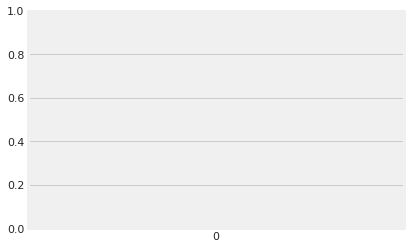

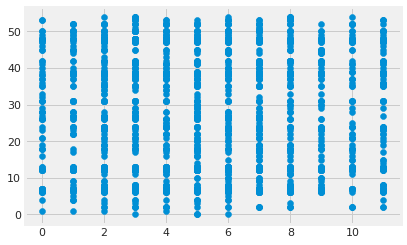

[[2.23131584 1.32987201 1.96192756 ... 1.6766815  1.1325569         nan]
 [0.26026409 0.14271716 0.44034184 ... 1.72815172 1.1325569         nan]
 [0.26026409 0.96172472 0.32045102 ... 1.6751218  1.1325569         nan]
 ...
 [0.26026409 1.61530633 2.60282961 ... 1.51759172 0.56269103        nan]
 [0.26026409 0.96172472 0.70084745 ... 1.48171854 0.56269103        nan]
 [0.26026409 0.96172472 0.44034184 ... 1.51135291 0.56269103        nan]]
Product                            0.0
Sub-product                        4.0
Issue                              2.0
Sub-issue                         13.0
Consumer complaint narrative    1107.0
Company public response            3.0
Company                          280.0
State                             32.0
ZIP code                         281.0
Tags                               2.0
Consumer consent provided?         0.0
Submitted via                      0.0
Date sent to company             260.0
Company response to consumer       0.0
Timely res

In [263]:
# Method 1: Box plot
sns.boxplot(X = dataset)

# Method 2: Scatter plot
fig, X1 = plt.subplots()
X1.scatter(dataset["Received_month"],dataset["State"])
plot = plt.show()

# Z_score
z = np.abs(stats.zscore(dataset))
print(z)

# IQR
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3-Q1
print(IQR)

In [264]:
from plotly.offline import iplot, init_notebook_mode
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
sns.set(style='white')
dataset['Issue'].astype(str).str.strip("'").value_counts()[0:15].iplot(kind='bar',title='Top 15 issues',fontsize=14,color='green')

Splitting the dataset into training and testing data

In [265]:
dataset.drop(dataset.columns[len(dataset.columns)-1], axis=1, inplace=True)
bank_train,bank_test = train_test_split(dataset,test_size=0.2,random_state=0)

Feature Scaling

In [266]:
scale_bank  = StandardScaler()
train_data = scale_bank.fit_transform(bank_train)
test_data = scale_bank.fit_transform(bank_test)

After preprocessing plot the graph

In [267]:
pie_data = dataset.groupby(["State"]).size()
pie_chart = go.Pie(labels=pie_data.index,values=pie_data)
iplot([pie_chart])

K value using K means with cost elbow method

In [268]:
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)
kmeans.fit(train_data)
kmeans.inertia_
kmeans.cluster_centers_
kmeans.n_iter_

11

cost elbow method

[28416.0, 25850.252316660717, 24141.949749339503, 23031.30928981427, 21656.603756872504, 20844.3319708665, 19491.495319912246, 18958.46981229467, 18434.861525325632, 18112.27261582255, 17790.168158964632, 17413.735997487085, 17160.953119824364, 16907.331400272647, 16617.796494098522, 16425.93067186239]
range(1, 17)


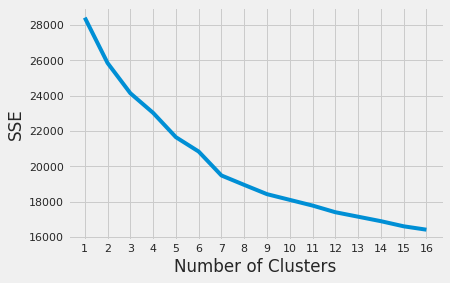

In [269]:
kmeans_kwargs = {"init": "random","n_init": 17,"max_iter": 300,"random_state": 42}
sse = []
for k in range(1, 17):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(train_data)
  sse.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
print(sse)
t = range(1,17)
print(t)
plt.plot(range(1,17), sse)
plt.xticks(range(1, 17))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Method 2: Using silhouette coefficients 

In [270]:
silhouette_coefficients = []
for k in range(2, 17):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(train_data)
  score = silhouette_score(train_data, kmeans.labels_)
  silhouette_coefficients.append(score)

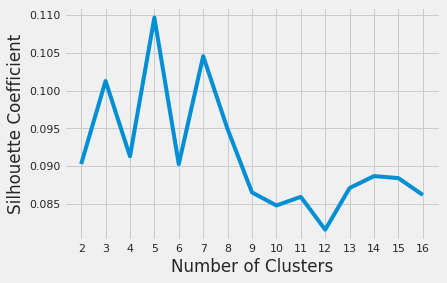

In [271]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 17), silhouette_coefficients)
plt.xticks(range(2, 17))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Model evaluation based on  Cohesion and seperation

Evaluating using DBSCAN

Use moons() to evaluate data

In [272]:
features, true_labels = make_moons(n_samples=250, noise=0.05, random_state=42)
scaled_features = scale_bank.fit_transform(features)
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=6)
dbscan = DBSCAN(eps=0.3)

kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round (2)
print(kmeans_silhouette)
print(dbscan_silhouette)

0.5
0.38


Find the cost for the above clustering techniques and plot the graph for that

In [273]:
!pip install kmodes

In [274]:
from kmodes.kmodes import KModes
cost = []
for num_clusters in list(range(1,16)):
  kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 1, verbose=1)
  kmode.fit_predict(train_data)
  cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 18081.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 519, cost: 17452.0
Run 1, iteration: 2/100, moves: 9, cost: 17452.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 467, cost: 17201.0
Run 1, iteration: 2/100, moves: 12, cost: 17201.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 744, cost: 16940.0
Run 1, iteration: 2/100, moves: 3, cost: 16940.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 731, cost: 16647.0
Run 1, iteration: 2/100, moves: 11, cost: 16647.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 568, cost: 16433.0
Run 1, iteration: 

Plot the graph at different cluster values, we need to change that to numpy array for that

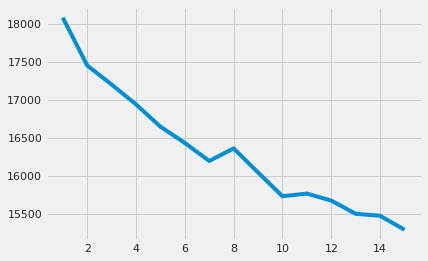

In [275]:
y = np.array([i for i in range(1,16,1)])
plt.plot(y,cost)

We got best values when cluster size was 11 and 13

Get the cluster value and check the max number of issues

In [276]:
  kmode = KModes(n_clusters=13, init = "random", n_init = 1, verbose=1)
  data1 = kmode.fit_predict(dataset)
  kmode = KModes(n_clusters=11, init = "random", n_init = 1, verbose=1)
  data2 = kmode.fit_predict(dataset)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 776, cost: 19686.0
Run 1, iteration: 2/100, moves: 64, cost: 19673.0
Run 1, iteration: 3/100, moves: 1, cost: 19673.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 662, cost: 19689.0
Run 1, iteration: 2/100, moves: 23, cost: 19689.0


In [277]:
dataset.describe()

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Received_month
count,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.0,2221.0,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000
mean,0.104457,5.387663,8.157587,20.721297,1103.859072,5.530392,273.973435,27.466457,297.787933,1.235480,0.0,0.0,262.782530,1.253940,0.957226,0.241333,1110.000000,5.340387
std,0.401442,2.716916,2.629428,10.436519,638.126826,2.362355,158.766730,16.324783,160.608131,0.923625,0.0,0.0,153.214949,0.764876,0.202392,0.427988,641.291795,2.950085
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,7.000000,16.000000,550.000000,4.000000,136.000000,12.000000,166.000000,0.000000,0.0,0.0,127.000000,1.000000,1.000000,0.000000,555.000000,3.000000
50%,0.000000,5.000000,7.000000,19.000000,1104.000000,4.000000,255.000000,26.000000,289.000000,2.000000,0.0,0.0,266.000000,1.000000,1.000000,0.000000,1110.000000,5.000000
75%,0.000000,8.000000,9.000000,29.000000,1657.000000,7.000000,416.000000,44.000000,447.000000,2.000000,0.0,0.0,387.000000,1.000000,1.000000,0.000000,1665.000000,7.000000
max,2.000000,9.000000,15.000000,43.000000,2209.000000,9.000000,555.000000,54.000000,557.000000,2.000000,0.0,0.0,536.000000,3.000000,1.000000,1.000000,2220.000000,11.000000


In [278]:
  dataset['data1']=data1
  dataset['data2']= data2
  pd.crosstab(dataset["Issue"],dataset['State']).iplot(kind='bar',title='Issues disctribution in Clusters')